# Eigenvalues and eigenvectors

## The quadratic forms perspective

In the previous section on quadratic forms, we investigated functions of the form


$$
f(x) = x^\top A x
$$


for an $n\times n$ matrix $A$. In particular, we considered the problem of finding _extrema_ of such functions -- that is, maxima and minima -- under the condition that $\|x\|_2^2 = x^\top x = 1$. This problem can be written as


$$
\begin{aligned}
&\max_{x}\;\; x^\top Ax\\
&\text{subject to}\;\; x^\top x = 1
\end{aligned}
$$


Using the theory of Lagrange multipliers (don't worry if you haven't seen these before), this problem can be solved by considering the _Langrangian_ 


$$
L(x,\lambda) = x^\top A x - \lambda(x^\top x - 1)
$$


By taking partial derivatives of this function with respect to $x$ and setting it equal to zero, we get the following condition for $x$ to be an extrema of $f(x)$ subject to $x^\top x = 1$:


$$
0 = \nabla_x L(x,\lambda) = 2Ax - 2\lambda x \implies Ax = \lambda x
$$


Thus the maxima of $x^\top A x$ subject to $x$ being a unit vector satisfy the equation $Ax = \lambda x$. Solutions of this equation $(\lambda, x)$ are called _eigenvalue/eigenvector_ pairs of the matrix $A$. 

**Remark:** The condition that $x$ is a unit vector doesn't change much in how we solve the equation $Ax = \lambda x$. Indeed, no matter what the norm of $x$ is, we have


$$
Ax = \lambda x \iff \frac{1}{\|x\|_2}Ax = \frac{1}{\|x\|_2}\lambda x \iff A\left(\frac{x}{\|x\|_2}\right) = \lambda \left (\frac{x}{\|x\|_2}\right) \iff Ax' = \lambda x'
$$


where $x' = \frac{x}{\|x\|_2}$ is always a unit vector. Hence if we can solve $Ax = \lambda x$ for any nonzero $x$, we can always find a solution that is a unit vector simply by normalizing.

Before seeing how we can solve the equation $Ax = \lambda x$, we will look at a geometric interpretation of eigenvalues and eigenvectors.

## The geometric perspective

Above we saw that the equation $Ax = \lambda x$ can arise out of a maximization problem with quadratic forms. However, it also can be viewed geometrically. In words, the condition $Ax = \lambda x$ means "applying the linear transformation $A$ to $x$ is the same as rescaling $x$ by $\lambda$". For a general square matrix $A$ and arbitrary vector $x$, the vector $Ax$ will be a rotated _and_ rescaled version of $x$, so the pair $(\lambda, x)$ must be a very special pair. 

As a special case, let's consider what happens with a diagonal matrix $A = \begin{pmatrix}a_1 & 0\\ 0 & a_2\end{pmatrix}$. Then 


$$
Ax = \begin{pmatrix}a_1 & 0\\ 0 & a_2\end{pmatrix}\begin{pmatrix}x_1 \\ x_2\end{pmatrix}= \begin{pmatrix}a_1x_1 \\ a_2x_2\end{pmatrix}
$$


So the question for diagonal matrices is, when do we have that 


$$
Ax = \begin{pmatrix}a_1x_1 \\ a_2x_2\end{pmatrix} = \lambda  \begin{pmatrix}x_1 \\ x_2\end{pmatrix}
$$


It's easy to see from the above expression that equation will hold if and only if $x = e_1 = \begin{pmatrix}1\\0\end{pmatrix}$ or $x = e_2 = \begin{pmatrix}0\\1\end{pmatrix}$. In this case


$$
Ae_1 =  \begin{pmatrix}a_1 \\ 0\end{pmatrix} = a_1 e_1 \;\;\;\; \text{ and } \;\;\;\; Ae_2 =  \begin{pmatrix}0 \\ a_2\end{pmatrix} = a_2e_2
$$


Therefore, we have _two_ eigenvalue/eigenvector pairs for $A$, namely $(a_1, e_1)$ and $(a_2, e_2)$. It turns out that this is always true for diagonal matrix.

> For an $n\times n$ diagonal matrix $A = \text{diag}(a_1,\dots, a_n)$, the eigenvalue/eigenvector pairs of $A$ are given by $(a_1,e_1),\dots, (a_n, e_n)$.

The solution for diagonal $A$ was pretty straightforward, so let's see another example. Consider 


$$
A = \begin{pmatrix}2 & 1\\ 1 &2\end{pmatrix}
$$


Let's see how this matrix acts on unit vectors $x$.

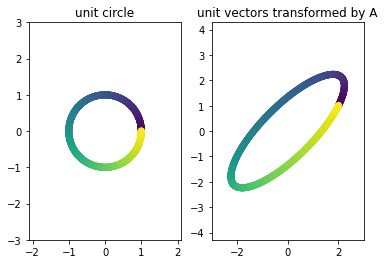

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2,1],[1,2]])

theta_range = np.arange(0,2*np.pi+.01,.01) 
unit_x = np.array([[np.cos(theta), np.sin(theta)] for theta in theta_range]).T #parameterize the unit circle
Ax = np.dot(A, unit_x)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(unit_x[0], unit_x[1], c=theta_range)
ax2.scatter(Ax[0], Ax[1], c=theta_range)
ax1.axis('equal')
ax2.axis('equal')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
ax1.set_title('unit circle')
ax2.set_title('unit vectors transformed by A')
plt.show()

Most of the vectors on the unit circle appear to have been rescaled _and_ rotated. For example, let's look at how $A$ acts on the standard basis vectors $e_1, e_2$.

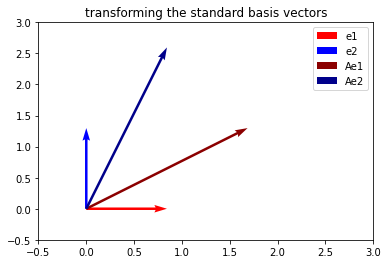

In [2]:
e1 = np.array([1,0])
e2 = np.array([0,1])
origin = np.zeros(2)

plt.quiver(*origin, *e1, label='e1', scale=1, units='xy', color='red')
plt.quiver(*origin, *e2, label='e2', scale=1, units='xy', color='blue')
plt.quiver(*origin, *np.dot(A,e1), label='Ae1', scale=1, units='xy', color='darkred')
plt.quiver(*origin, *np.dot(A,e2), label='Ae2', scale=1, units='xy', color='darkblue')
plt.xlim(-.5,3)
plt.ylim(-.5,3)
plt.title('transforming the standard basis vectors')
plt.legend()
plt.show()

 Indeed, we see that the standard basis vectors get rotated -- not just rescaled -- by $A$, and so we cannot have that $Ae_1 = \lambda e_1$ or $Ae_2 = \lambda e_2$. On the other hand, consider the vectors


$$
u_1 = \begin{pmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{pmatrix}, \hspace{10mm} u_2 = \begin{pmatrix}1/\sqrt{2}\\ -1/\sqrt{2}\end{pmatrix}
$$


Let's see what happens when we act on these vectors with $A$.

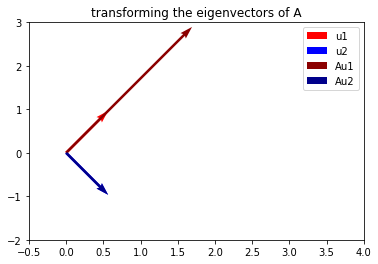

In [3]:
u1 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
u2 = np.array([1/np.sqrt(2),-1/np.sqrt(2)])
origin = np.zeros(2)

plt.quiver(*origin, *u1, label='u1', scale=1, units='xy', color='red')
plt.quiver(*origin, *u2, label='u2', scale=1, units='xy', color='blue')
plt.quiver(*origin, *np.dot(A,u1), label='Au1', scale=1, units='xy', color='darkred')
plt.quiver(*origin, *np.dot(A,u2), label='Au2', scale=1, units='xy', color='darkblue')
plt.xlim(-.5,4)
plt.ylim(-2,3)
plt.title('transforming the eigenvectors of A')
plt.legend()
plt.show()

Indeed, this time we have that $Au_1$ and $Au_2$ _are_ just rescaled versions of $u_1$ and $u_2$. In particular, we can check that


$$
Au_1 = 3u_1\;\;\;\; \text{ and }\;\;\;\; Au_2 = u_2
$$


which means that $(3,u_1)$ and $(1,u_2)$ are the _eigenvalue/eigenvector_ pairs for the matrix $A$. 

## Finding eigenvalues and eigenvectors

So far, we've seen examples of eigenvalues and eigenvectors, but haven't seen how we can actually _find_ them in practice for non-diagonal matrices. Here we discuss how we can do this.

First, let's rewrite the equation $Ax = \lambda x$:


$$
Ax = \lambda x \iff  Ax- \lambda I x =0 \iff (A-\lambda I)x = 0
$$


Therefore, to find the eigenvalues, we want to find all numbers $\lambda$ such that $(A-\lambda I)x$ is equal to zero for some non-zero vector $x.$ This cannot be possible if the matrix $(A-\lambda I)$ is full rank, since then the only vector $x$ for which $(A-\lambda I)x=0$ is $x=0$. Thus we want all values of $\lambda$ such that $A-\lambda I$ is _not_ full rank. One way to characterize this is by checking for which values of $\lambda$ the _determinant_ of $A-\lambda I$ is equal to zero. This gives us the following condition for the eigenvalues of a square matrix $A$.

> Let $A$ be an $n\times n$ matrix. Then $\lambda$ is an eigenvalue for $A$ if and only if $\det(A-\lambda I) = 0$.

In particular, to find the eigenvalues of $A$, we want to find the zeros of the function


$$
p(\lambda) = \det(A-\lambda I).
$$


When $A$ is an $n\times n$ matrix, the function $p(\lambda)$ will be a degree $n$ polynomial, which will in general have $n$ roots.  While we haven't discussed determinants much in this class, we have seen examples of them in two dimensions, so let's focus on that case. Recall that


$$
\text{det}\begin{pmatrix}a &b\\c&d\end{pmatrix} = ad-bc
$$


In particular then, if $A = \begin{pmatrix}a_{11} & a_{12}\\ a_{21}&a_{22}\end{pmatrix}$, then


$$
p(\lambda) = \det(A - \lambda I) = \det \begin{pmatrix}a_{11}-\lambda & a_{12}\\ a_{21}&a_{22}-\lambda\end{pmatrix} = (a_{11}-\lambda)(a_{22}-\lambda) - a_{12}a_{21} = \lambda^2 - (a_{11}+a_{22})\lambda + a_{11}a_{22}-a_{12}a_{21}
$$


This is a polynomial of degree 2, which by the quadratic formula has roots:


$$
\lambda_1 = \frac{(a_{11}+a_{22}) + \sqrt{(a_{11}+a_{22})^2 - 4(a_{11}a_{22}-a_{12}a_{21})}}{2},\;\; \lambda_2 = \frac{(a_{11}+a_{22}) - \sqrt{(a_{11}+a_{22})^2 - 4(a_{11}a_{22}-a_{12}a_{21})}}{2}
$$


Let's apply this formula to the matrix $A =  \begin{pmatrix}2 & 1\\ 1 &2\end{pmatrix}$ that we considered in the last section. We have $a_{11}= a_{22}=2$ and $a_{21} = a_{12} = 1$, so


$$
\lambda_1 = \frac{4 + \sqrt{16-4(3)}}{2} = 3\;\;\;\;\text{ and }\;\;\;\; \lambda_2 = \frac{4 - \sqrt{16-4(3)}}{2} = 1
$$


which were exactly the eigenvalues we found before. Now, given these eigenvalues, how can we find the corresponding eigenvectors $u_1$ and $u_2$? We want that


$$
Au_1 = 3u_1 \implies  \begin{pmatrix}2 & 1\\ 1 &2\end{pmatrix}\begin{pmatrix}u_{11}\\ u_{12}\end{pmatrix} = 3\begin{pmatrix}u_{11}\\ u_{12}\end{pmatrix}
$$


and 


$$
Au_2 = u_2 \implies  \begin{pmatrix}2 & 1\\ 1 &2\end{pmatrix}\begin{pmatrix}u_{21}\\ u_{22}\end{pmatrix} = \begin{pmatrix}u_{21}\\ u_{22}\end{pmatrix}.
$$


These systems each give us two linear equations with two unknowns, which we can straightforwardly solve to find


$$
u_1 = \begin{pmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{pmatrix}, \hspace{10mm} u_2 = \begin{pmatrix}1/\sqrt{2}\\ -1/\sqrt{2}\end{pmatrix}.
$$


More generally, we can use the following approach to find the eigenvalue/eigenvector pairs of an $n\times n$ matrix $A$:

- Find the eigenvalues $\lambda_1,\dots, \lambda_n$ by finding the roots of the polynomial $p(\lambda) = \det(A-\lambda I)$.
- Find the eigenvectors $u_1,\dots,u_n$ by solving the $n$ systems of $n$ linear constraints $Au_i = \lambda_i u_i$ for $i=1,\dots,n$. 

(Of course, in practice, this algorithm is difficult to apply by hand, so we will use Python functions to compute the eigenvalue decompositions of larger matrices.) Given the $n$ eigenvalues $\lambda_1,\dots, \lambda_n$ and $n$ eigenvectors $u_1,\dots, u_n$ of an $n\times n$ matrix $A$, we can write the equations $Au_i = \lambda_i u_i$ simultaneously as follows. Let $U = \begin{pmatrix} u_1 & \cdots &u_n\end{pmatrix}$ be the matrix whose columns are the eigenvectors, and let $\Lambda = \text{diag}(\lambda_1,\dots, \lambda_n)$ be the diagonal matrix with the eigenvalues on the diagonal. Then


$$
Au_i = \lambda_i u_i \;\; \forall i \iff AU = U\Lambda \iff A = U\Lambda U^{-1}
$$


The decomposition $A = U\Lambda U^{-1}$ is called the _eigenvalue decomposition_ of $A$. 

## Symmetric matrices

In general, the roots of the polynomial $p(\lambda) = \det(A-\lambda I)$ need not be real-valued -- even in the 2-d case, we will have complex valued eigenvalues whenever $(a_{11}+a_{22})^2 - 4(a_{11}a_{22}-a_{12}a_{21}) < 0$. On the other hand, if $A$ is _symmetric_, so that $A^\top =A$, then the eigenvalues and eigenvectors of $A$ will always be real-valued. (If you're interested in why, and are familiar with complex numbers, see the remark below.)

Furthermore, for symmetric matrices, the eigenvectors of $A$ are always _orthogonal_. In particular, this means that the matrix $U$ is an orthogonal matrix satisfying $U^\top U = I$ and $UU^\top = I$, since $U$ is square. This means that $U^{-1} = U^\top$, and so in paritcular we can simplify the expression in the eigendecomposition:


$$
A = U\Lambda U^\top
$$


Let's see an example in Python, using the `np.linalg.eig(A)` function to find eigenvalues. To find a symmetric matrix $A$, we will use the following approach: first, draw a random $n\times n$ matrix $B$, and then let $A = B^\top B$.

In [4]:
n = 10
B = np.random.normal(size=(n,n))
A = np.dot(B.T, B) # B^T B is always a symmetric matrix

Lambda, U = np.linalg.eig(A)
Lambda = np.diag(Lambda) # numpy returns Lambda as an array, so let's make it a diagonal matrix

Now let's verify that $A = U\Lambda U^\top$.

In [5]:
ULUT = np.dot(U, np.dot(Lambda, U.T))
np.allclose(A, ULUT)

True

Indeed, the two matrices are the same. Next, let's check that $U$ is in fact orthogonal, by checking that $U^\top U = I$:

In [6]:
UTU = np.dot(U.T, U).round(8)
UTU

array([[ 1., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  1., -0., -0., -0., -0.,  0., -0.,  0.,  0.],
       [ 0., -0.,  1.,  0., -0.,  0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0., -0., -0.,  0.,  0., -0.],
       [-0., -0., -0.,  0.,  1.,  0., -0.,  0., -0., -0.],
       [ 0., -0.,  0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0.,  0., -0., -0.,  0.,  1., -0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0., -0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  1.,  0.],
       [ 0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  1.]])

We get the identity back, and so $U$ is in fact orthogonal.

**Remark:** Let's quickly see why symmetric matrices always have real-valued eigenvalues. For a number/vector $x$, let $\bar{x}$ denote its complex conjugate. Then for any real matrix $A$, let $(\lambda, v)$ be an eigenvalue/eigenvector pair of $A$. Since $A$ is real-valued, we have that $\overline{Av} = \bar{\lambda}\bar{v}$. Then if $A=A^\top$, we have


$$
\bar{v}^\top A v = \bar{v}^\top (\lambda v) = \lambda \bar{v}^\top v
$$


and


$$
\bar{v}^\top A v = \bar{v}^\top A^\top v = (A\bar{v}^\top)v = \bar{\lambda}\bar{v}^\top v.
$$


Therefore $\lambda \bar{v}^\top v = \bar{\lambda}\bar{v}^\top v$ which implies $\lambda = \bar{\lambda}$, and so $\lambda$ must be a real number.